In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

pd.set_option('display.max_columns', None)

print("✓ Bibliothèques importées avec succès")

✓ Bibliothèques importées avec succès


In [2]:
df = pd.read_csv('../data/raw/dataset_brut.csv')
print(f"Dataset chargé: {df.shape[0]} lignes, {df.shape[1]} colonnes")
display(df.head())

Dataset chargé: 600 lignes, 34 colonnes


,Date,53_kW_mean,53_kW_max,71_kW_mean,71_kW_max,71A_kW_mean,71A_kW_max,83_kW_mean,83_kW_max,totalkW_mean,totalkW_max,totalkW_d-1,totalkW_w-1,totalkW_d/1,totalkW_w/1,71_71AkW_mean,71_71AkW_max,Month,Year,Day,WD,53_kW_time_max,71_kW_time_max,71A_kW_time_max,83_kW_time_max,71_71AkW_time_max,totalkW_time_max,CDD_15,HDD_25,NWD,temp_max,insolation,temp_mean,RH
0,08/06/2018,52.79,67.96,89.46,115.07,111.90,151.02,92.41,160.01,346.46,481.12,NaN,NaN,NaN,NaN,201.37,266.09,6,2018,8,4,09:00,11:00,11:00,08:00,11:00,11:00,1.2,9.1,0,20.8,0.6,16.10,83.25
1,09/06/2018,37.91,48.90,56.49,82.70,64.58,82.70,38.87,53.22,197.77,229.41,-148.69,NaN,0.57,NaN,121.11,154.62,6,2018,9,5,02:00,15:00,01:00,17:00,15:00,01:00,1.7,8.9,0,19.7,0.6,15.82,86.75
2,10/06/2018,32.76,42.79,46.89,75.51,63.68,68.32,31.72,37.40,175.04,220.42,-22.73,NaN,0.89,NaN,110.57,143.83,6,2018,10,6,21:00,00:00,01:00,16:00,01:00,02:00,4.1,5.9,0,24.5,2.3,19.14,83.25
3,11/06/2018,50.77,64.72,76.27,129.45,117.30,197.77,98.35,174.40,342.68,535.06,167.64,NaN,1.96,NaN,193.64,309.24,6,2018,11,0,18:00,16:00,17:00,14:00,17:00,17:00,7.1,3.2,0,27.8,6.2,21.58,71.25
4,12/06/2018,50.02,62.57,91.19,115.07,131.07,201.37,99.07,170.80,371.45,533.62,28.77,NaN,1.08,NaN,222.22,316.43,6,2018,12,1,08:00,15:00,14:00,11:00,15:00,15:00,8.3,2.2,0,27.9,4.9,23.46,59.00


In [3]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("=" * 80)
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES")
print("=" * 80)

stats_df = df[numeric_cols].describe().T
stats_df['variance'] = df[numeric_cols].var()
stats_df['skewness'] = df[numeric_cols].skew()
stats_df['kurtosis'] = df[numeric_cols].kurtosis()

display(stats_df)

STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
53_kW_mean,600.0,50.232383,9.492733,25.03,41.2050,52.985,57.100,69.83,90.111981,-0.470397,-0.783822
53_kW_max,600.0,63.342033,11.121755,35.96,55.2900,64.720,71.200,94.57,123.693433,-0.125006,-0.485206
71_kW_mean,600.0,52.907250,43.257855,0.00,0.0000,70.620,90.985,133.48,1871.242045,-0.263526,-1.682989
71_kW_max,600.0,69.453117,58.276682,0.00,0.0000,82.700,122.260,186.98,3396.171685,-0.123534,-1.592132
71A_kW_mean,600.0,135.962467,60.597422,48.11,91.8400,118.570,178.395,273.10,3672.047532,0.663769,-0.703828
71A_kW_max,600.0,201.180467,95.299182,50.34,140.2400,179.790,266.990,413.52,9081.934081,0.474918,-0.772180
83_kW_mean,600.0,78.341150,28.502611,22.42,44.9100,89.410,98.110,134.84,812.398851,-0.469032,-1.132232
83_kW_max,600.0,134.192683,60.378153,25.17,57.5300,156.420,177.720,243.08,3645.521365,-0.481850,-1.231433
totalkW_mean,600.0,317.448867,76.457315,137.29,231.1200,340.170,374.690,459.55,5845.721004,-0.364605,-1.151580
totalkW_max,600.0,450.196483,150.679525,151.02,262.4100,496.760,567.690,709.82,22704.319322,-0.401054,-1.302352


In [4]:
print("\n" + "=" * 80)
print("INTERPRÉTATION DE L'ASYMÉTRIE (SKEWNESS)")
print("=" * 80)
print("Skewness > 0.5  : Distribution asymétrique à droite")
print("Skewness < -0.5 : Distribution asymétrique à gauche")
print("-0.5 ≤ Skewness ≤ 0.5 : Distribution approximativement symétrique\n")

for col in numeric_cols:
    skew = df[col].skew()
    if skew > 0.5:
        print(f"{col}: {skew:.2f} - Asymétrique à droite")
    elif skew < -0.5:
        print(f"{col}: {skew:.2f} - Asymétrique à gauche")
    else:
        print(f"{col}: {skew:.2f} - Approximativement symétrique")


INTERPRÉTATION DE L'ASYMÉTRIE (SKEWNESS)
Skewness > 0.5  : Distribution asymétrique à droite
Skewness < -0.5 : Distribution asymétrique à gauche
-0.5 ≤ Skewness ≤ 0.5 : Distribution approximativement symétrique

53_kW_mean: -0.47 - Approximativement symétrique
53_kW_max: -0.13 - Approximativement symétrique
71_kW_mean: -0.26 - Approximativement symétrique
71_kW_max: -0.12 - Approximativement symétrique
71A_kW_mean: 0.66 - Asymétrique à droite
71A_kW_max: 0.47 - Approximativement symétrique
83_kW_mean: -0.47 - Approximativement symétrique
83_kW_max: -0.48 - Approximativement symétrique
totalkW_mean: -0.36 - Approximativement symétrique
totalkW_max: -0.40 - Approximativement symétrique
totalkW_d-1: 0.33 - Approximativement symétrique
totalkW_w-1: -0.18 - Approximativement symétrique
totalkW_d/1: 1.40 - Asymétrique à droite
totalkW_w/1: 1.61 - Asymétrique à droite
71_71AkW_mean: -0.21 - Approximativement symétrique
71_71AkW_max: -0.30 - Approximativement symétrique
Month: -0.36 - Approxi

DISTRIBUTIONS DES VARIABLES NUMÉRIQUES


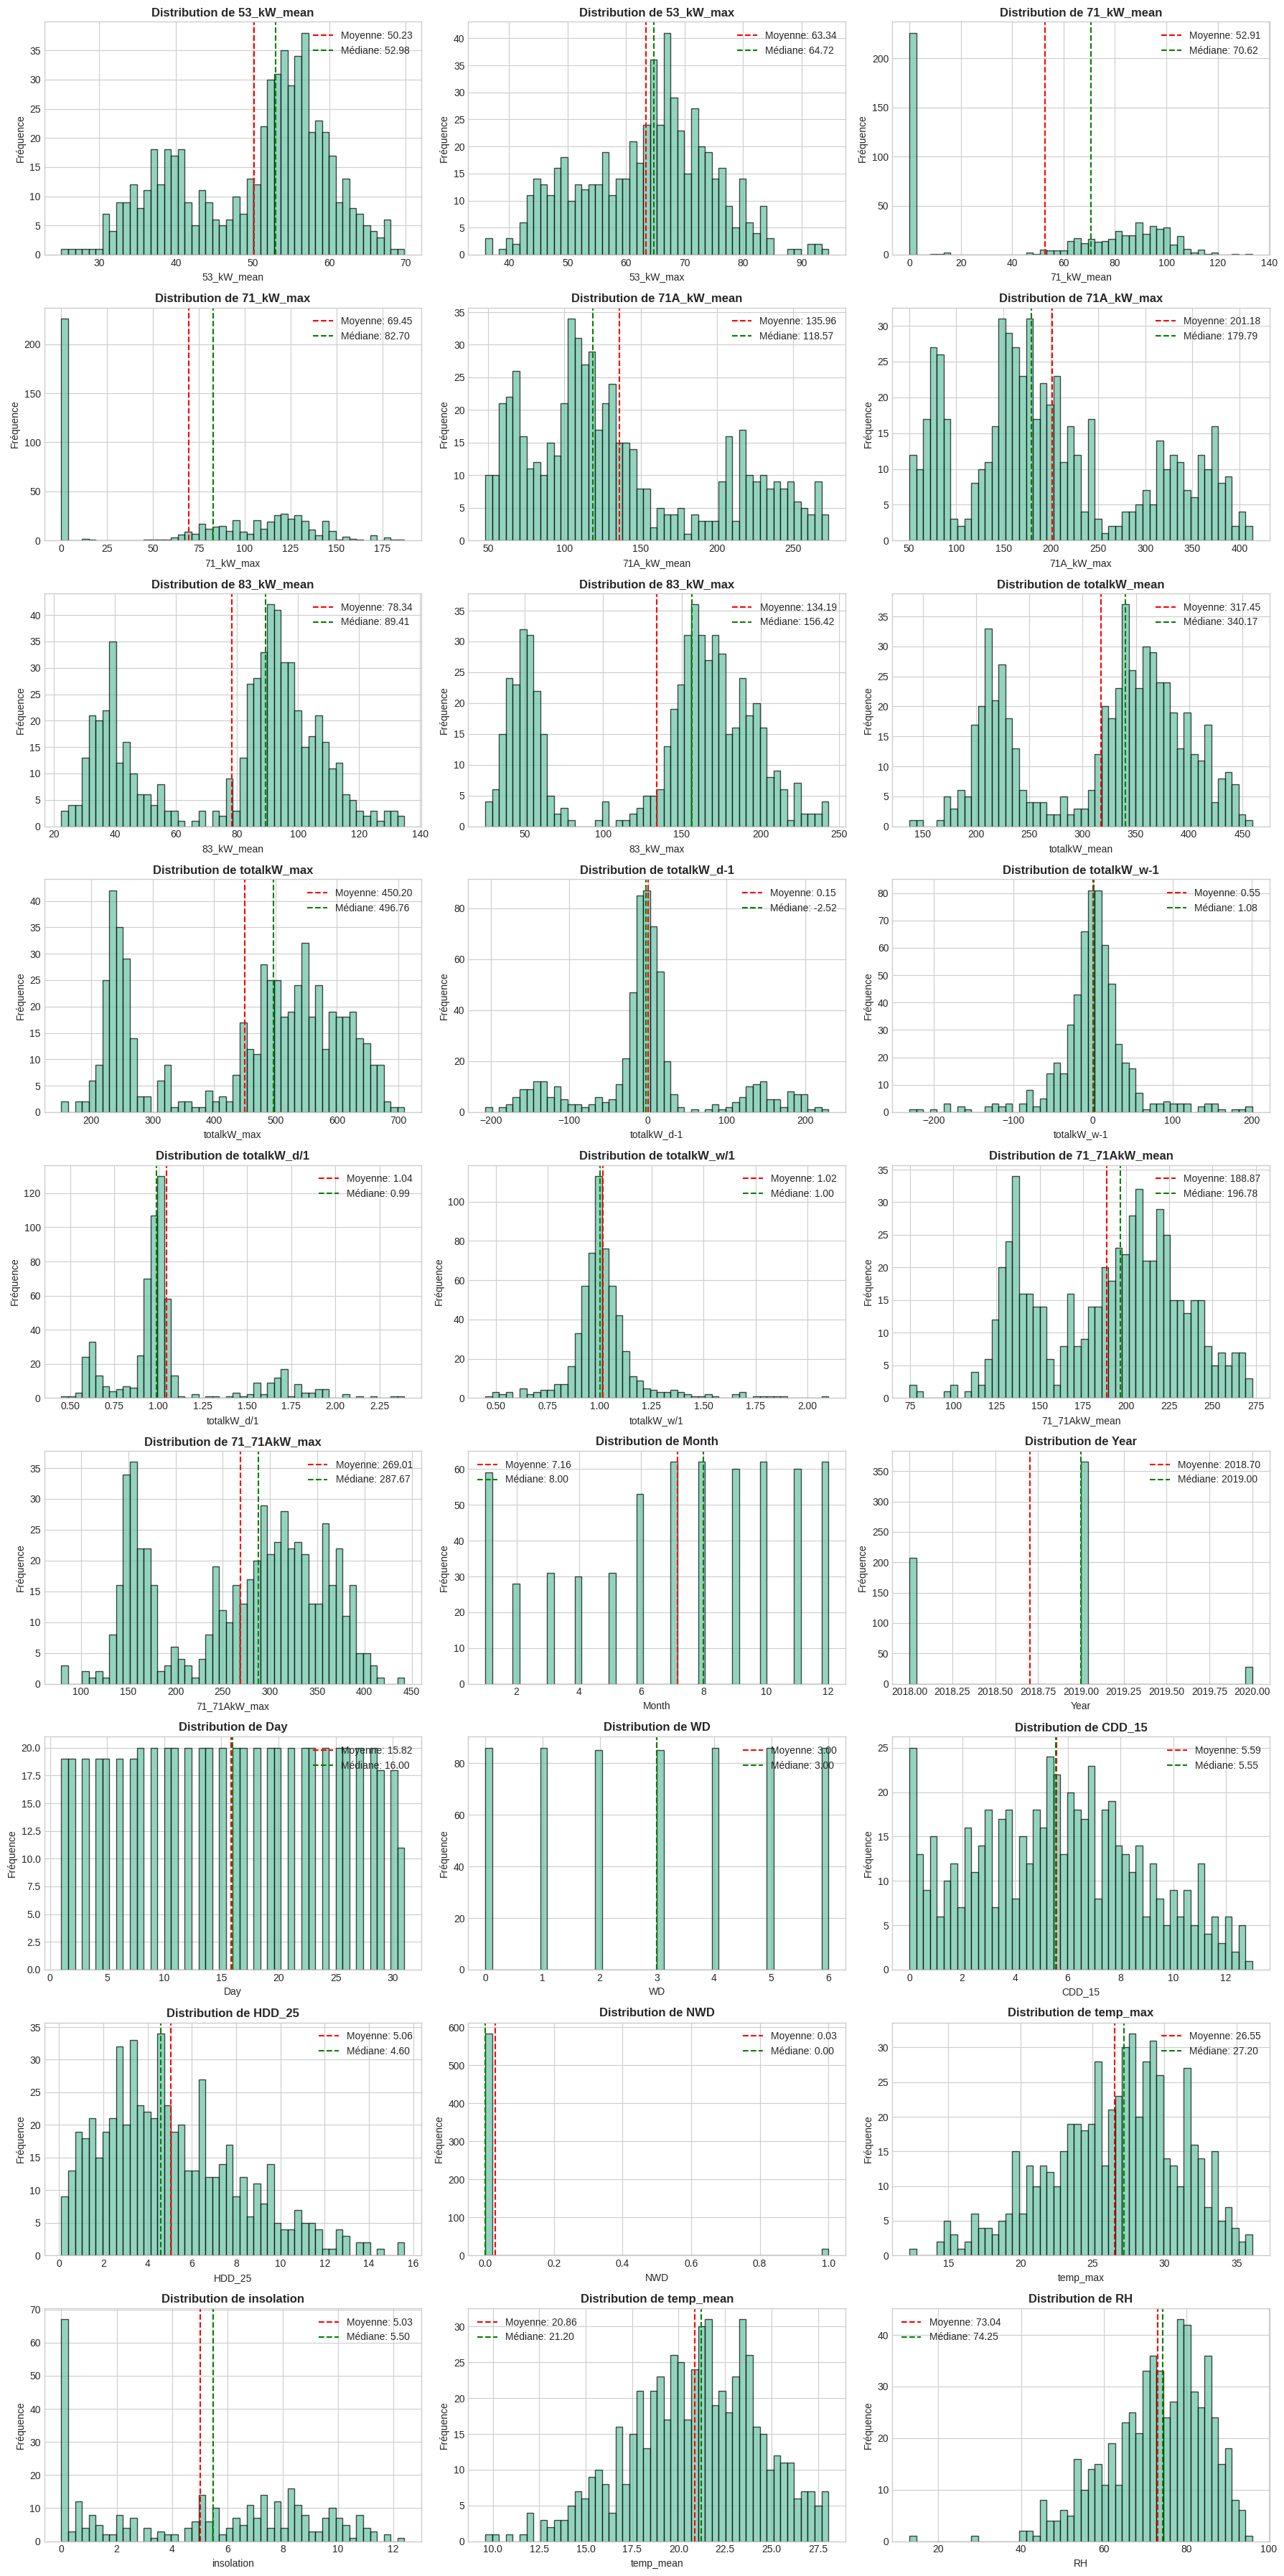

In [5]:
print("=" * 80)
print("DISTRIBUTIONS DES VARIABLES NUMÉRIQUES")
print("=" * 80)

n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Moyenne: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', label=f'Médiane: {df[col].median():.2f}')
    axes[idx].legend()

for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../visualizations/distributions_variables.png', dpi=300, bbox_inches='tight')
plt.show()


DÉTECTION DES OUTLIERS - BOXPLOTS


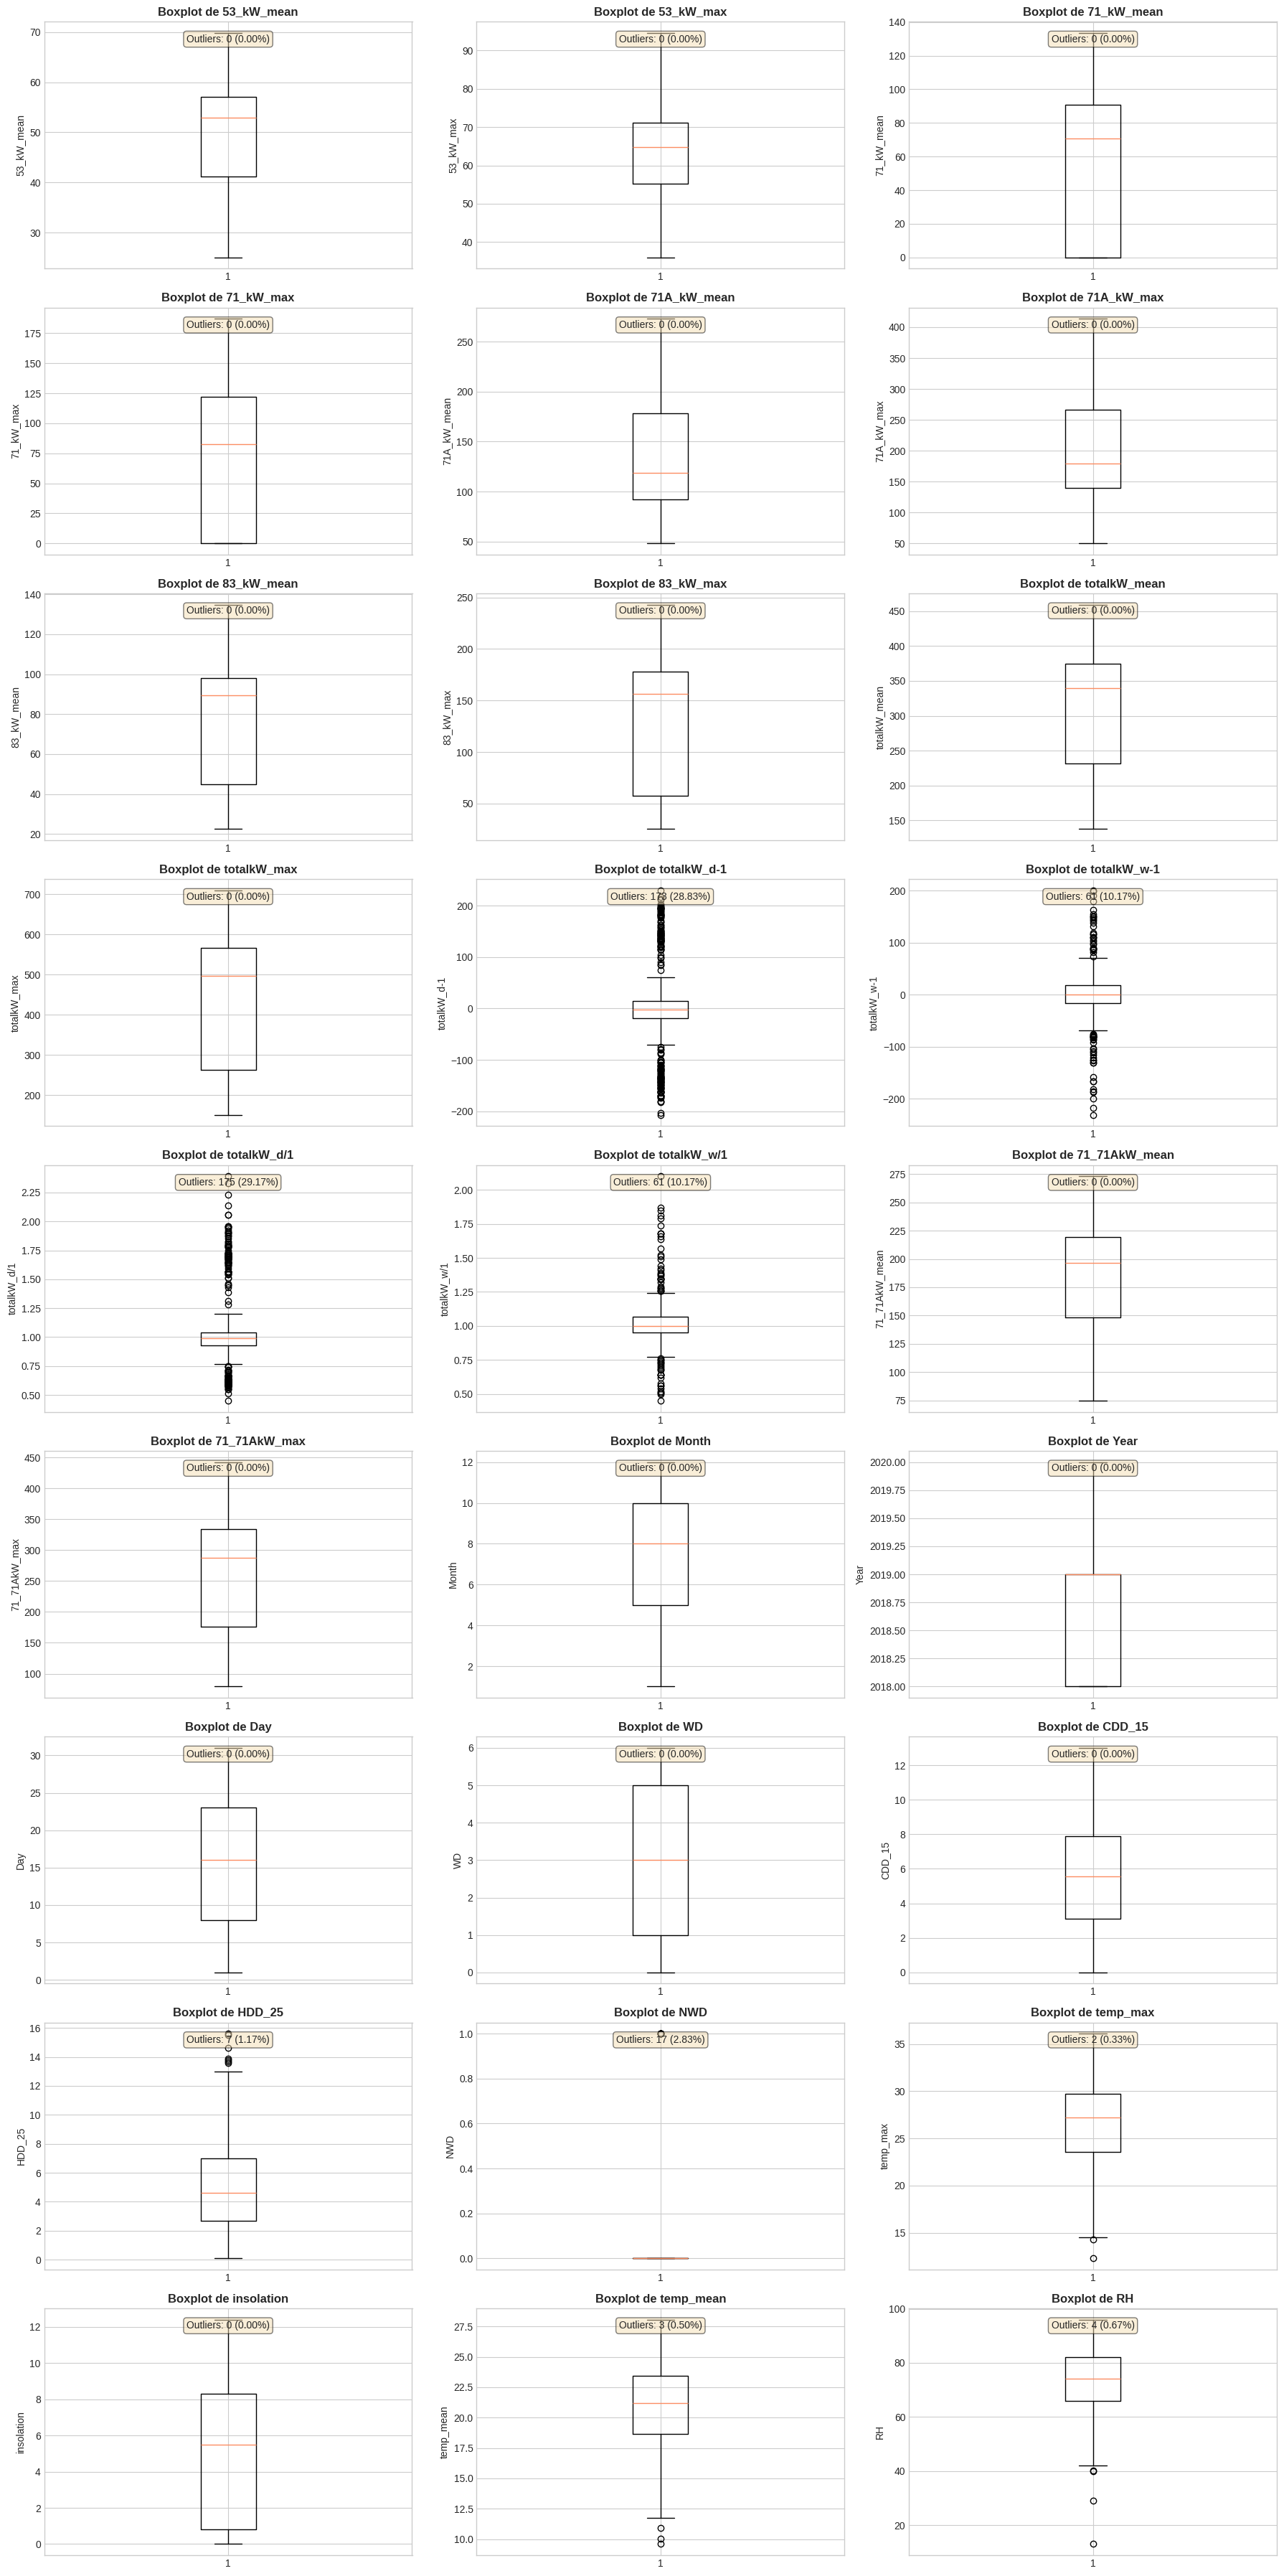

In [6]:
print("\n" + "=" * 80)
print("DÉTECTION DES OUTLIERS - BOXPLOTS")
print("=" * 80)

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)', 
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../visualizations/boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

MATRICE DE CORRÉLATION


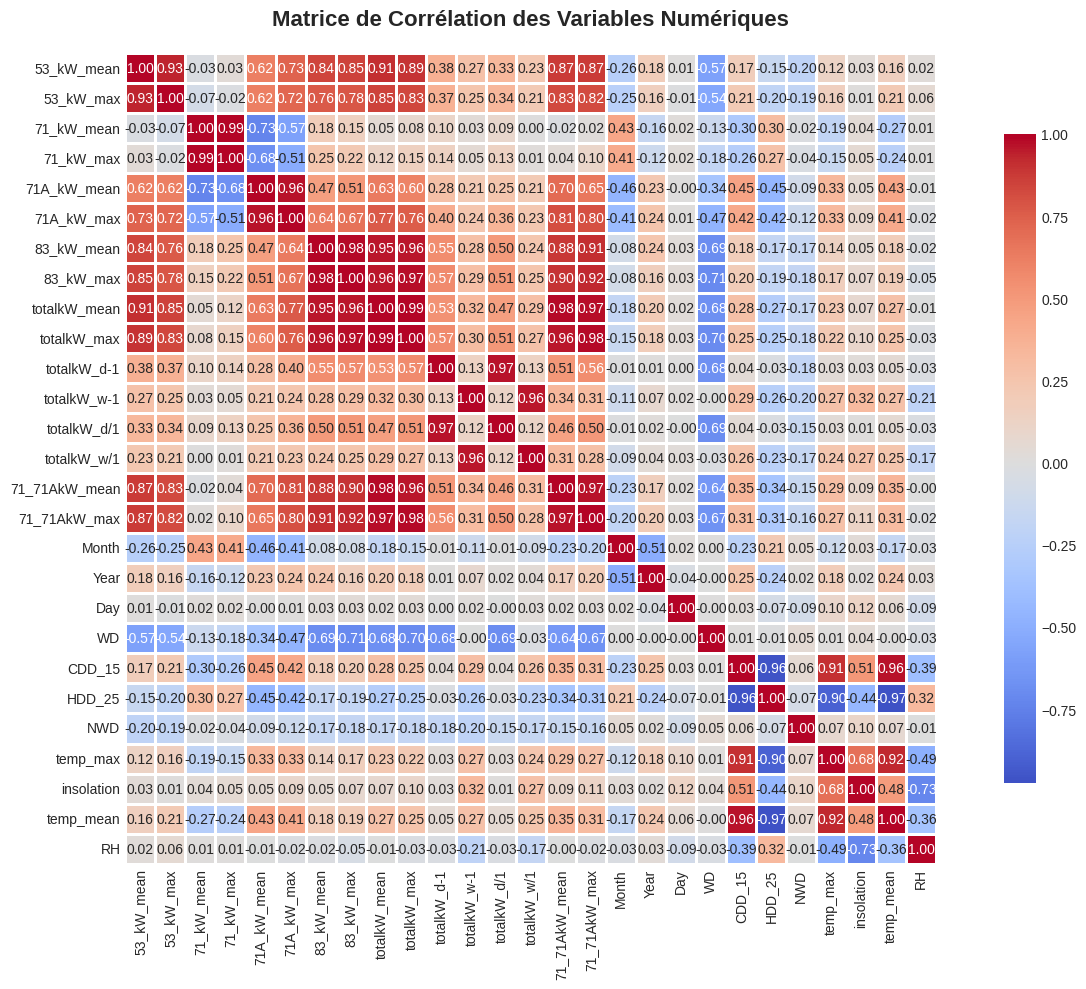

,53_kW_mean,53_kW_max,71_kW_mean,71_kW_max,71A_kW_mean,71A_kW_max,83_kW_mean,83_kW_max,totalkW_mean,totalkW_max,totalkW_d-1,totalkW_w-1,totalkW_d/1,totalkW_w/1,71_71AkW_mean,71_71AkW_max,Month,Year,Day,WD,CDD_15,HDD_25,NWD,temp_max,insolation,temp_mean,RH
53_kW_mean,1.000000,0.931308,-0.026893,0.031808,0.615282,0.733802,0.839561,0.851841,0.909681,0.893255,0.380474,0.273280,0.333210,0.231549,0.871068,0.871643,-0.255002,0.181691,0.005773,-0.572612,0.170455,-0.153636,-0.203474,0.121653,0.029175,0.158074,0.024628
53_kW_max,0.931308,1.000000,-0.074592,-0.018461,0.617949,0.719817,0.761815,0.777711,0.847281,0.832466,0.368818,0.246166,0.338166,0.208252,0.825189,0.821331,-0.246383,0.158093,-0.011042,-0.544348,0.210734,-0.201459,-0.187116,0.156025,0.010389,0.207662,0.056762
71_kW_mean,-0.026893,-0.074592,1.000000,0.986647,-0.729353,-0.572496,0.179702,0.146977,0.051358,0.076077,0.099155,0.029256,0.087178,0.000943,-0.022544,0.020412,0.430067,-0.158529,0.020707,-0.131678,-0.297288,0.302336,-0.021777,-0.187265,0.038292,-0.268608,0.007457
71_kW_max,0.031808,-0.018461,0.986647,1.000000,-0.679636,-0.511014,0.249690,0.217511,0.116590,0.150549,0.143156,0.045683,0.130523,0.014282,0.036172,0.099495,0.407747,-0.120038,0.024954,-0.183210,-0.263327,0.267632,-0.035577,-0.154303,0.052472,-0.236225,0.006477
71A_kW_mean,0.615282,0.617949,-0.729353,-0.679636,1.000000,0.964619,0.474490,0.508436,0.633279,0.599984,0.280097,0.211122,0.250196,0.211681,0.700406,0.646052,-0.461174,0.227650,-0.001190,-0.342120,0.451023,-0.449775,-0.089106,0.332801,0.053214,0.430220,-0.007367
71A_kW_max,0.733802,0.719817,-0.572496,-0.511014,0.964619,1.000000,0.635025,0.668694,0.768555,0.758795,0.395501,0.239336,0.357775,0.230808,0.812340,0.803549,-0.414800,0.244680,0.007207,-0.470321,0.420565,-0.423301,-0.118396,0.325401,0.090301,0.407278,-0.023386
83_kW_mean,0.839561,0.761815,0.179702,0.249690,0.474490,0.635025,1.000000,0.983807,0.954870,0.958295,0.554462,0.278636,0.496030,0.239169,0.880875,0.907504,-0.081317,0.240322,0.028652,-0.694159,0.182666,-0.172865,-0.169975,0.142012,0.052052,0.177936,-0.020910
83_kW_max,0.851841,0.777711,0.146977,0.217511,0.508436,0.668694,0.983807,1.000000,0.958743,0.972155,0.565573,0.285614,0.507590,0.248700,0.896331,0.924582,-0.082425,0.160622,0.030128,-0.708357,0.197160,-0.185067,-0.177414,0.165147,0.074366,0.191514,-0.049708
totalkW_mean,0.909681,0.847281,0.051358,0.116590,0.633279,0.768555,0.954870,0.958743,1.000000,0.986826,0.532065,0.322354,0.473947,0.286827,0.979011,0.970228,-0.184258,0.202934,0.022159,-0.675596,0.278575,-0.268981,-0.171558,0.225881,0.070823,0.274995,-0.006335
totalkW_max,0.893255,0.832466,0.076077,0.150549,0.599984,0.758795,0.958295,0.972155,0.986826,1.000000,0.567365,0.304531,0.508350,0.268617,0.956135,0.982951,-0.149899,0.178904,0.028940,-0.697527,0.253979,-0.249068,-0.178204,0.218812,0.096134,0.253312,-0.027342


In [7]:
print("=" * 80)
print("MATRICE DE CORRÉLATION")
print("=" * 80)

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

display(correlation_matrix)

In [8]:
print("\n" + "=" * 80)
print("CORRÉLATIONS FORTES (|r| > 0.7)")
print("=" * 80)

strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Corrélation', key=abs, ascending=False)
    display(strong_corr_df)
else:
    print("Aucune corrélation forte détectée (|r| > 0.7)")


CORRÉLATIONS FORTES (|r| > 0.7)


,Variable 1,Variable 2,Corrélation
33,totalkW_mean,totalkW_max,0.986826
15,71_kW_mean,71_kW_max,0.986647
23,83_kW_mean,83_kW_max,0.983807
37,totalkW_max,71_71AkW_max,0.982951
34,totalkW_mean,71_71AkW_mean,0.979011
45,HDD_25,temp_mean,-0.973292
29,83_kW_max,totalkW_max,0.972155
35,totalkW_mean,71_71AkW_max,0.970228
38,totalkW_d-1,totalkW_d/1,0.966844
40,71_71AkW_mean,71_71AkW_max,0.965367


In [9]:
target_variable = 'consommation'

if target_variable in df.columns:
    print("\n" + "=" * 80)
    print(f"CORRÉLATION AVEC LA VARIABLE CIBLE: {target_variable}")
    print("=" * 80)
    
    target_corr = correlation_matrix[target_variable].sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    target_corr.drop(target_variable).plot(kind='barh', color='steelblue')
    plt.title(f'Corrélation des variables avec {target_variable}', fontsize=14, fontweight='bold')
    plt.xlabel('Coefficient de corrélation')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('../visualizations/correlation_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    display(target_corr)

SCATTERPLOTS - PAIRES FORTEMENT CORRÉLÉES


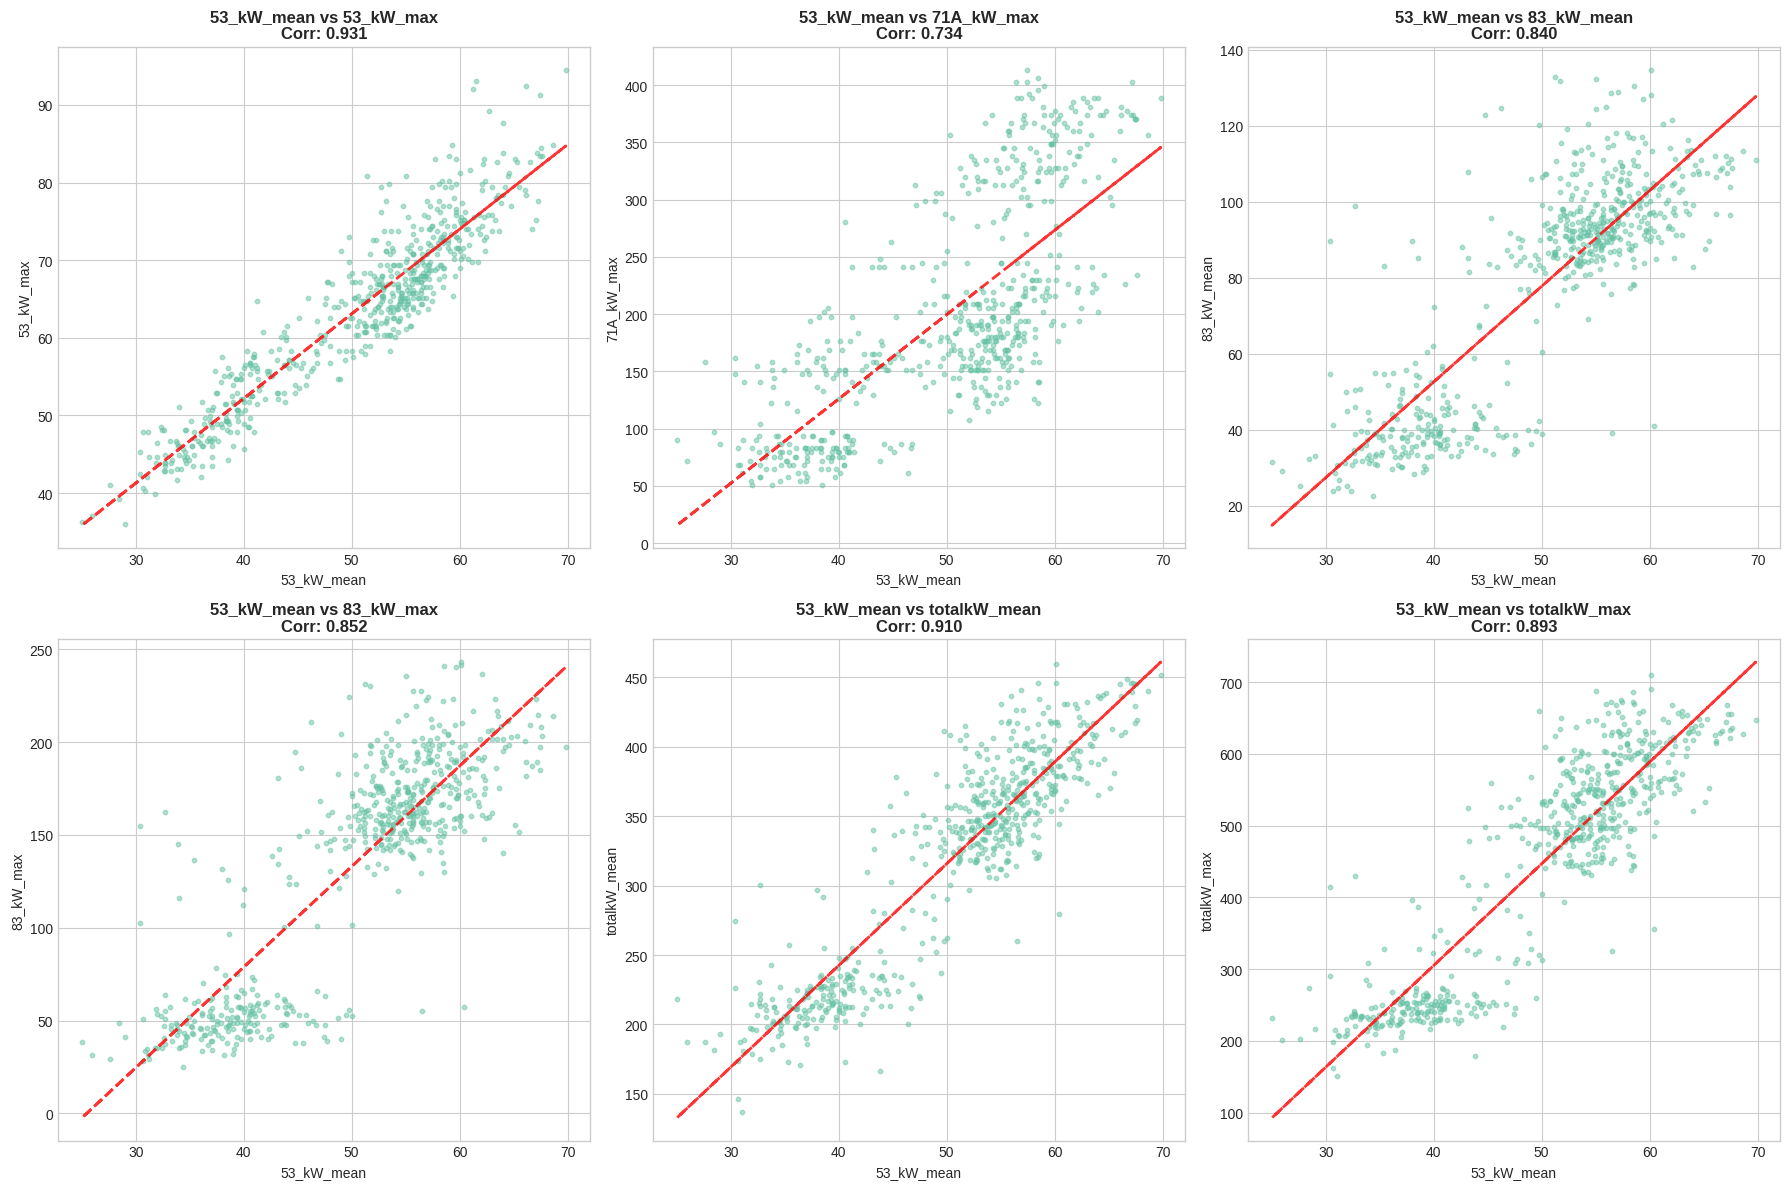

In [10]:
if strong_corr:
    print("=" * 80)
    print("SCATTERPLOTS - PAIRES FORTEMENT CORRÉLÉES")
    print("=" * 80)
    
    n_pairs = min(6, len(strong_corr))  # Maximum 6 graphiques
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx in range(n_pairs):
        var1 = strong_corr[idx]['Variable 1']
        var2 = strong_corr[idx]['Variable 2']
        corr_val = strong_corr[idx]['Corrélation']
        
        axes[idx].scatter(df[var1], df[var2], alpha=0.5, s=10)
        axes[idx].set_xlabel(var1)
        axes[idx].set_ylabel(var2)
        axes[idx].set_title(f'{var1} vs {var2}\nCorr: {corr_val:.3f}', fontweight='bold')
        
        z = np.polyfit(df[var1].dropna(), df[var2].dropna(), 1)
        p = np.poly1d(z)
        axes[idx].plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
    
    for idx in range(n_pairs, 6):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('../visualizations/scatterplots_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()

## 2.7 Analyse des variables catégorielles

DISTRIBUTION DES VARIABLES CATÉGORIELLES


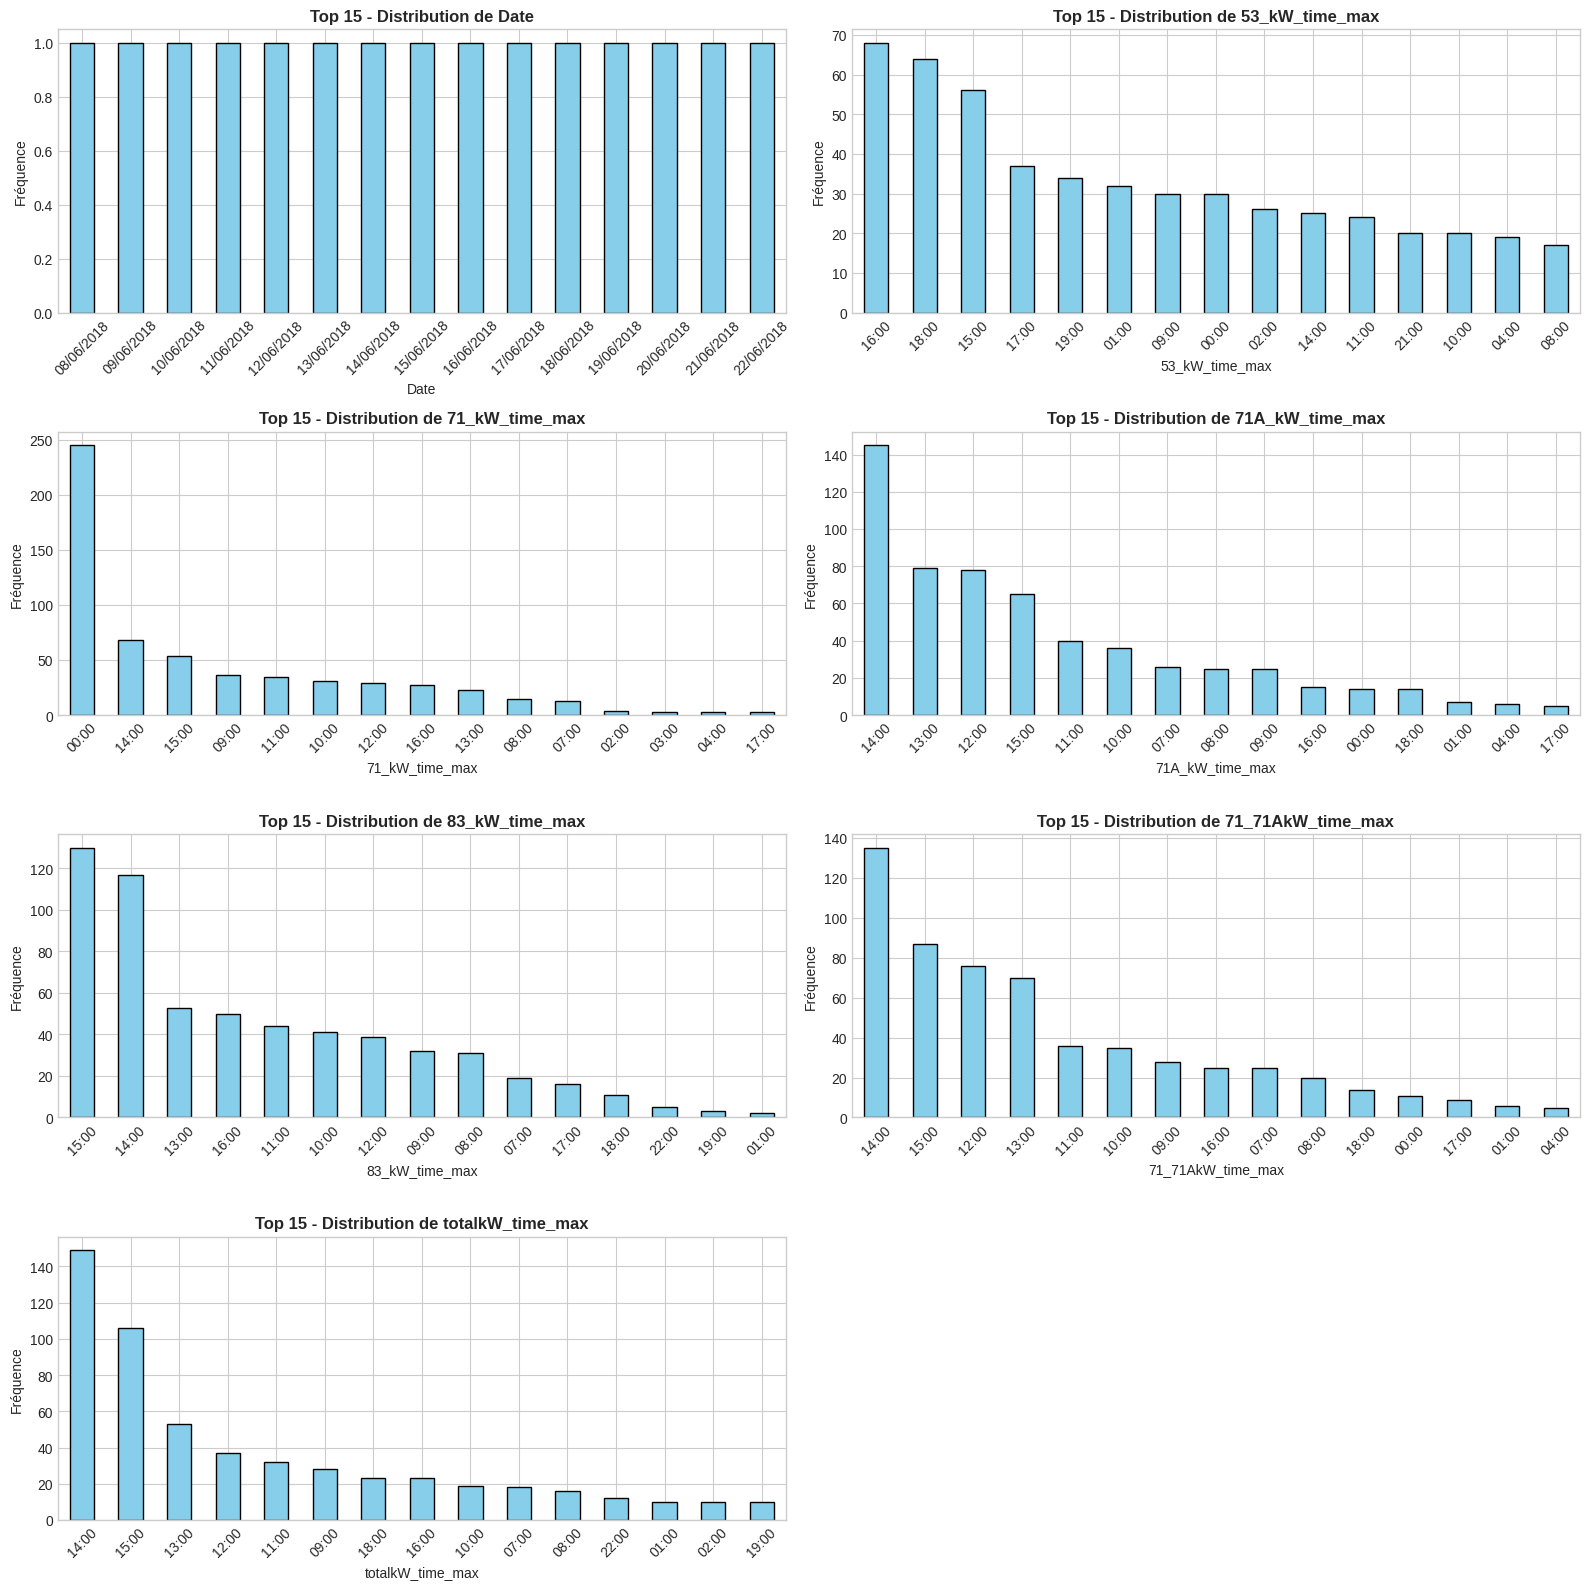

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("=" * 80)
    print("DISTRIBUTION DES VARIABLES CATÉGORIELLES")
    print("=" * 80)
    
    n_cat = len(categorical_cols)
    n_rows_cat = (n_cat + 1) // 2
    
    fig, axes = plt.subplots(n_rows_cat, 2, figsize=(16, n_rows_cat * 4))
    if n_cat == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        
        if len(value_counts) <= 15:  # Bar plot si peu de catégories
            value_counts.plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
            axes[idx].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Fréquence')
            axes[idx].tick_params(axis='x', rotation=45)
        else:  # Top 15 si beaucoup de catégories
            value_counts.head(15).plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
            axes[idx].set_title(f'Top 15 - Distribution de {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Fréquence')
            axes[idx].tick_params(axis='x', rotation=45)
    
    for idx in range(n_cat, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('../visualizations/distributions_categoriques.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Aucune variable catégorielle dans le dataset")

## 2.8 Analyse temporelle (si applicable)

In [12]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    print("=" * 80)
    print("ANALYSE TEMPORELLE")
    print("=" * 80)
    
    time_col = datetime_cols[0]
    
    if target_variable in df.columns:
        plt.figure(figsize=(16, 6))
        plt.plot(df[time_col], df[target_variable], linewidth=0.5, alpha=0.7)
        plt.title(f'Évolution de {target_variable} dans le temps', fontsize=14, fontweight='bold')
        plt.xlabel(time_col)
        plt.ylabel(target_variable)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('../visualizations/evolution_temporelle.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("Aucune colonne temporelle détectée")
    print("Si votre dataset contient des dates, convertissez-les d'abord:")
    print("df['date_column'] = pd.to_datetime(df['date_column'])")

Aucune colonne temporelle détectée
Si votre dataset contient des dates, convertissez-les d'abord:
df['date_column'] = pd.to_datetime(df['date_column'])


## 2.9 Détection des outliers - Méthode statistique

In [13]:
print("=" * 80)
print("DÉTECTION DES OUTLIERS - MÉTHODE IQR")
print("=" * 80)

outliers_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    outliers_summary.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Borne inférieure': lower_bound,
        'Borne supérieure': upper_bound,
        'Nb outliers': len(outliers),
        '% outliers': f"{len(outliers)/len(df)*100:.2f}%"
    })

outliers_df = pd.DataFrame(outliers_summary)
display(outliers_df)

DÉTECTION DES OUTLIERS - MÉTHODE IQR


,Variable,Q1,Q3,IQR,Borne inférieure,Borne supérieure,Nb outliers,% outliers
0,53_kW_mean,41.2050,57.100,15.8950,17.36250,80.94250,0,0.00%
1,53_kW_max,55.2900,71.200,15.9100,31.42500,95.06500,0,0.00%
2,71_kW_mean,0.0000,90.985,90.9850,-136.47750,227.46250,0,0.00%
3,71_kW_max,0.0000,122.260,122.2600,-183.39000,305.65000,0,0.00%
4,71A_kW_mean,91.8400,178.395,86.5550,-37.99250,308.22750,0,0.00%
5,71A_kW_max,140.2400,266.990,126.7500,-49.88500,457.11500,0,0.00%
6,83_kW_mean,44.9100,98.110,53.2000,-34.89000,177.91000,0,0.00%
7,83_kW_max,57.5300,177.720,120.1900,-122.75500,358.00500,0,0.00%
8,totalkW_mean,231.1200,374.690,143.5700,15.76500,590.04500,0,0.00%
9,totalkW_max,262.4100,567.690,305.2800,-195.51000,1025.61000,0,0.00%


In [14]:
# Créer un rapport résumé
rapport_eda = {
    'date_analyse': pd.Timestamp.now(),
    'shape': df.shape,
    'variables_numeriques': list(numeric_cols),
    'variables_categoriques': list(categorical_cols) if len(categorical_cols) > 0 else [],
    'statistiques_descriptives': stats_df.to_dict(),
    'outliers': outliers_df.to_dict(),
}

# Sauvegarder
import json
with open('../reports/rapport_eda.json', 'w', encoding='utf-8') as f:
    json.dump(rapport_eda, f, indent=4, default=str)

print("✓ Rapport EDA sauvegardé dans '../reports/rapport_eda.json'")
print("✓ Visualisations sauvegardées dans '../visualizations/'")

✓ Rapport EDA sauvegardé dans '../reports/rapport_eda.json'
✓ Visualisations sauvegardées dans '../visualizations/'
